<a href="https://www.kaggle.com/code/ramsesmdlc/mnist-linear-classification?scriptVersionId=139652051" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# __0. Libraries__

In [27]:
#Import Libraries 

import numpy as np # linear algebra
import pandas as pd # data processing

import matplotlib as mpl # data visualization
import matplotlib.pyplot as plt # data visualization ("pyplot module", a.k.a. "plt")

    #Each "pyplot" function makes some change to a figure: e.g., creates a figure, creates a...
    #...plotting area in a figure, plots some lines in a plotting area, decorates the plot with...
    #...labels, etc. The various plots we can utilize using Pyplot are Line Plot, Histogram, Scatter,...
    #...3D Plot, Image, Contour, and Polar.

from sklearn.linear_model import SGDClassifier # Machine Learning Model (Linear Classification)
from sklearn.model_selection import cross_val_predict #Generating predictions from the Training Set

    #Performance Measures used in Classification Models
from sklearn.metrics import confusion_matrix #Performance Measure (Confusion Matrix)
from sklearn.metrics import precision_score, recall_score #Performance Measure (Precision and Recall Score)
from sklearn.metrics import f1_score #Performance Measure (F1 Score)
from sklearn.metrics import precision_recall_curve #Performance Measure (Precision Recall Curve)
from sklearn.metrics import roc_curve #Performance Measure (ROC Curve)
from sklearn.metrics import roc_auc_score #Performance Measure (ROC Curve AUC Score)

# __1. Important__

Type of machine learning system to build:

1. Supervised Learning: __Classification__
2. Batch Learning (also called "offline learning")
3. Model-based learning

Goal:
1. __It is to take an image of a handwritten single digit, and determine what that digit is.__

2. __Metric__: This competition is evaluated on the categorization accuracy of your predictions (the percentage of images you get correct).

# __2. Loading the Data - Training Dataset__

In [11]:
training_data = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")

## __2.1. General Information__

1. The data file contain __gray-scale images__ of hand-drawn digits, from 0 through 9.

2. Each image is __28 pixels in height and 28 pixels in width, for a total of 784 pixels in total.__

> __Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel__, with higher numbers meaning darker. 

> This pixel-value is an integer between 0 and 255, inclusive.

> __Each pixel is a feature__.

3. The __training data set, has 785 columns__. The first column, called "label", is the digit that was drawn by the user. The __rest of the columns contain the pixel-values of the associated image__.

4. __Each pixel column in the training set has a name like pixelx, where x is an integer between 0 and 783, inclusive__. 

> For example: To locate this pixel ("pixel31") on the image, "pixel31" indicates the pixel is in the fourth column from the left, and the second row from the top.

# __3. Exploratory Data Analysis (EDA) - Training Dataset__

In [12]:
def EDA(training_data):  
  # Print the "shape" of the dataframe
  print("\n" +'\033[1m','\033[94m',"Shape of the dataframe - some metric variables:",'\033[0m', training_data.shape, "\n")
    
  # Print the "keys" of the dataframe
  print('\033[1m','\033[94m',"Keys of the dataframe - some metric variables:",'\033[0m', "\n")
  print(training_data.keys())  
    
  # Print the "head" of the dataframe
  print('\033[1m','\033[94m',"Head of the dataframe - some metric variables:",'\033[0m', "\n")
  print(training_data.head())
  
  # Print the "general information" of the dataframe
  print("\n", '\033[1m','\033[94m',"Information of the dataframe - some metric variables:",'\033[0m', "\n")
  training_data.info()
 
  # Print the "number and percentage" of missing values per column" of some metric variables of the dataframe
  print("\n" +'\033[1m','\033[94m', "Number and percentage of missing values per column of some metric variables of the dataframe:", '\033[0m' + "\n")
  missing = training_data.isnull().sum()
  percent = missing / training_data.shape[0] * 100
  print(pd.concat([missing, percent], axis=1, keys=["Missing", "Percent"]))
    
# Call the function
EDA(training_data)


  Shape of the dataframe - some metric variables:  (42000, 785) 

  Keys of the dataframe - some metric variables:  

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)
  Head of the dataframe - some metric variables:  

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0

## __3.1. Adjusting the Training Dataset__

1. If we want to see the data (as an image), we should consider what is described in the section "2.1. General Information" (i.e. the pixel's value of the image of every number is entirely displayed in one single row composed by 784 values); therefore, it is necessary rescaling the data (i.e. rescale each row from a shape of {1 x 784} pixels to {28 x 28} pixels.

2. Before applying the "reshape" function, we need to transform our dataset from "Pandas dataframe" to a "Numpy Array", because the "Numpy Array" has the function "reshape" available.

In [13]:
#Separating the Y and X values (i.e. dependent and independent variables)
Y_training, X_training = training_data["label"],training_data.iloc[:, 1:785] 

#Printing the "shape" of the dependent and independent variables (separately)
print(Y_training.shape)
print(X_training.shape)

#Printing the "type" of the dependent and independent variables (separately)
print(type(Y_training))
print(type(X_training))

#Transforming the "independent variables" (from Pandas Dataframe to Numpy Array)
array_X = X_training.to_numpy()
print(array_X)

#Printing the "shape" of the independent variables (as a Numpy Array)
print(array_X.shape) 

(42000,)
(42000, 784)
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(42000, 784)



   Target Value of the Image:  

0

   Value of every pixel of the image (28 x 28 pixels):  

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   1  25 130 155 254
 254 254 157  30   2   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   8 103 253 253 253 253 253 253 253 253 114   2   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0  11 208 253 253 253
 253 253 253 253 253 253 253 107   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0  31 253 253 253 253 253 253 253 253 253 253 253 215
 101   3   0   0   0   0   0 

<function matplotlib.pyplot.show(close=None, block=None)>

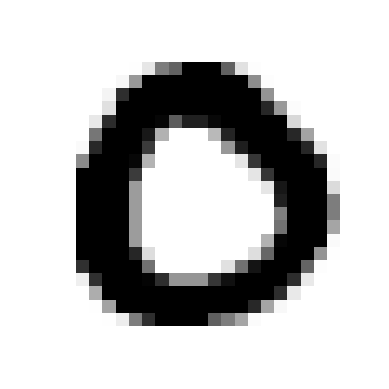

In [14]:
#Printing the image of a number (just to check!)

#Digit of row N°5, counting from 0,1,2,3,4 (without rescaling)
    #If we see the section "3. Exploratory Data Analysis (EDA) - Training Dataset", the output should
    #...be the number zero (0)
digitx1 = array_X[4]
print("\n", '\033[1m','\033[94m',"Target Value of the Image:",'\033[0m', "\n")
print(Y_training[4])
print("\n", '\033[1m','\033[94m',"Value of every pixel of the image (28 x 28 pixels):",'\033[0m', "\n")
print(digitx1)

#Digit of row N°5 (with rescaling)
digitx1_image = digitx1.reshape(28, 28)

#The matplotlibe function "imshow":
    #Display data as an image.
    #The input may either be actual RGB(A) data, or 2D scalar data, which will be rendered as a...
    #...pseudocolor image. For displaying a grayscale image set up the colormapping using the...
    #...parameters cmap='gray', vmin=0, vmax=255.
    #The number of pixels used to render an image is set by the Axes size and the dpi of the figure.
print("\n", '\033[1m','\033[94m',"Image (28 x 28 pixels):",'\033[0m', "\n")
plt.imshow(digitx1_image,cmap="binary")
plt.axis("off")
plt.show 


   Target Value of the Image:  

1

   Value of every pixel of the image (28 x 28 pixels):  

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   3 141
 139   3   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   9 254 254   8   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   9 254 254   8   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   9 254 254 106   0   0   0   0
   0   0   0   0   0   0   0 

<function matplotlib.pyplot.show(close=None, block=None)>

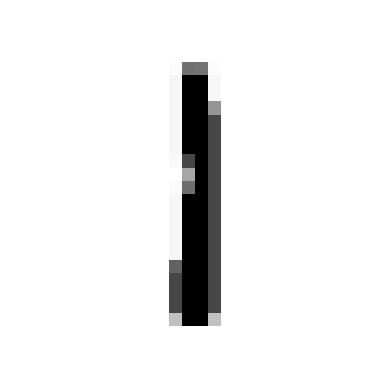

In [6]:
#Printing the image of a number (just to check!)

#Digit of row N°3, counting from 0,1,2 (without rescaling)
    #If we see the section "3. Exploratory Data Analysis (EDA) - Training Dataset", the output should
    #...be the number one (1)
digitx2 = array_X[2]
print("\n", '\033[1m','\033[94m',"Target Value of the Image:",'\033[0m', "\n")
print(Y_training[2])
print("\n", '\033[1m','\033[94m',"Value of every pixel of the image (28 x 28 pixels):",'\033[0m', "\n")
print(digitx2)

#Digit of row N°3 (with rescaling)
digitx2_image = digitx2.reshape(28, 28)

#The matplotlibe function "imshow":
    #Display data as an image.
    #The input may either be actual RGB(A) data, or 2D scalar data, which will be rendered as a...
    #...pseudocolor image. For displaying a grayscale image set up the colormapping using the...
    #...parameters cmap='gray', vmin=0, vmax=255.
    #The number of pixels used to render an image is set by the Axes size and the dpi of the figure.
print("\n", '\033[1m','\033[94m',"Image (28 x 28 pixels):",'\033[0m', "\n")
plt.imshow(digitx2_image,cmap="binary")
plt.axis("off")
plt.show 

# __4. Training Model (Binary Classifier) - Training Dataset__

1. __Binary Classifier__: distinguish between two classes. Some models are:

> Logistic Regression

> Support Vector Machines

2. __Multiclass Classifier__: distinguish between two or more classes. Some models are:

> __SGD Classifier (model that can be also used as "Binary Classifier")__

> Random Forests Classifiers

> Naive Bayes Classifiers

In [26]:
#Considering a "Binary Classifier" approach, we are going to build a model to detect the number nine (9).

#Model to use: SGDClassifier

#Defining the two classes:
    #Class N°1: all numbers that are nine (9) in the dataset of images.
    #Class N°2: all numbers that are not nine (9) in the dataset of images.

#Defining Class N°1: 
y_train_9 = (Y_training == 9) 

#Defining the model for the training phase

#random_state
    #It is an argument from the function "SGDClassifier"
    #It is used for shuffling the data, when shuffle is set to True.
    #It is useful for reproducibility of outputs across multiple function calls.
    #If you dont want to change the global "seed" value and only want to set the "state" for one task,..
    #...random_state is used. 
#random.seed()    
    #It is a function, not an argument.
    #It is little bit differente from the argument "random_state"
    #The effect of setting the "seed" is global as it will end up effecting all functions.
sgd_bin_clf = SGDClassifier(random_state = 42)
sgd_bin_clf.fit(X_training, y_train_9)

#The output of our model (based on the training set) apparently are good, considering that we should...
#...detect the image of number nine (9) and the first three outputs fo the array show...
#..."False, False, False" because those number's images belong to the numbers "1,0,1" (accordingly...
#...to section "3. Exploratory Data Analysis (EDA) - Training Dataset")
sgd_bin_clf.predict(X_training)

array([False, False, False, ..., False, False,  True])

# __5. Performance Measure - Training Model (Binary Classifier) - Training Dataset__

## __5.1. Confusion Matrix__

__Key ideas:__

1. The basic idea is to count the number of time an item (instance) of a specific class (for example: Class W) is classified as another class (for example: Class H).

In [ ]:
#Step 1 (Cross-Validation)
    #In this step we are going to generate "predictions" using the training data. 
    #Then those "predictions" will be compared to the known target values.
    
#Step 2 (Confusion Matrix)
    #In this step we are going to generate "predictions" using the training data. 
    #Then those "predictions" will be compared to the known target values.

# __<span style="color:red">UNFINISHED NOTEBOOK! - I AM STILL WORKING ON IT!</span>__